# 3차테스트
* 학습대상 : test_3.csv(약 1600개) --> WinSCP에서 추가 폴더 로드 및 중복제거
* 채점대상 : unfamiliar.csv(68개) --> test_2의 채점 데이터에서 추가중복제거

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [ ]:
df = pd.read_csv('test_3.csv')
df.head()

,html,label
0,"eCash Cards: trusted, automatic Visa cre...",0.0
1,Cash Machine For Everybody - Easy to u...,0.0
2,netAuth You are connected throu...,0.0
3,QF Market - Fast Transfers QF...,0.0
4,[OFFICIAL & ORIGINAL] BITCOIN x200 SERV...,0.0


# 전처리

In [ ]:
df['label'] = df['label'].apply(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   html    1597 non-null   object
 1   label   1597 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.1+ KB


### label확인시 성범죄 관련(1) 자료가 많이 부족함을 알 수 있음
* 중복제거 로직이 원인!

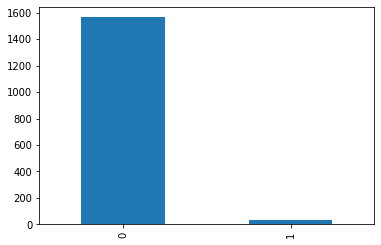

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
# label과 html 분리
input = df['html']
target = df['label']
print('html개수 확인 : ',len(input))
print('label개수 확인 : ',len(target))

html개수 확인 :  1597
label개수 확인 :  1597


In [ ]:
# 영어 아닌 특수문자(영어 외 언어 및 특수기호)을 전부 처리하는 코드 작성

nltk.download('words')
words = set(nltk.corpus.words.words())
processed_html = []
for num in range(1597):
  a = input[num]
  if '$' in a :                                 # 달러표시 있으면 
    sent = re.sub('[^a-zA-z0-9$]',' ',a)        # 달러표시는 살려줌 --> $ 100 , $ 2000 과 같은 현상 발생 --> 붙여줄 필요가 있는가? / 붙여주려면 어떻게?
    edit = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if w.lower() in words or not w.isalpha())
    processed_html.append(edit)
  else : 
    sent = re.sub('[^a-zA-z0-9]',' ',a)
    edit_2 = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if w.lower() in words or not w.isalpha())
    processed_html.append(edit_2)
len(processed_html)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


1597

In [ ]:
processed_html[1]

'Cash Machine For Everybody Easy to use Account US and EU Credit Cash Machine For Everybody Best Solution to get Money Quickly Fresh and New Every Day Different and Available All our Goods are 100 Free Clean socks5 for each account in the same Town as the Holder All have the Balance and are Linked to Bank Account and Credit Card of the owner Account if Amount is Different than what We Agreed Complete Step by Step Guide Very Easy Cash Out Out in Less Than 4 What do you need Please select a product Account Tutorial socks5 1580 $ 0 00147 Account Tutorial socks5 2730 $ 0 00249 Account Tutorial socks5 4290 $ 0 00381 Account Tutorial socks5 8810 $ 0 00879 Account Tutorial socks5 16190 $ 0 01070 Account Tutorial socks5 27720 $ 0 01466 Account Tutorial socks5 4270 $ 0 00381 Account Tutorial socks5 4320 $ 0 00381 Bank Account min4000 $ max6000 $ 0 00381 Bank of Account min4000 $ max6000 $ 0 00381 Pack 15 x 100eur pin 1500 0 00528 Pack 45 x 100eur pin 4500 0 01114 Pack 90 x 100eur pin 9000 0 017

In [ ]:
# 불용어 리스트
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

179

In [ ]:
# 불용어 단어 추가시
stop_words = set(stopwords.words('english'))
new_stop_words = []  # 추가할 불용어 리스트 안에 작성
stop_words.update(new_stop_words)
print('불용어 단어 개수 : ',len(stop_words))

불용어 단어 개수 :  179


In [ ]:
# 불용어 제거한 토큰 리스트 만들기
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import text_to_word_sequence
result = []   # 빈 리스트
for num in range(1597):
  word_tokens = text_to_word_sequence(processed_html[num])   # processed_html 모든 문장을 단어별로 쪼개줌
  each_list = []            # 각 html별 list
  for w in word_tokens:
    if w not in stop_words:    # 불용어 체크한 뒤 불용어 아닌 단어들만 each_list에 포함
      each_list.append(w)
  result.append(each_list)     # 각각의 each_list를 result안에 집어넣음
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# 학습할 단어수 제한(할 경우 사용)
'''
vocab_size= 1000
tokenizer = Tokenizer()  
tokenizer.fit_on_texts(result)
words_frequency = []
for word,index in tokenizer.word_index.items():
  if index >= vocab_size :           # 단어 인덱스 숫자가 vocab_size 보다 큰 것들만 모아줌
    words_frequency.append(word)
for word in words_frequency:
  del tokenizer.word_index[word]     # words_frequency에 있는 단어들을 Tokenizer()의 word_index 및 word_counts에서 제거
  del tokenizer.word_counts[word]
print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(result))
sequences = tokenizer.texts_to_sequences(result)  
'''

In [ ]:
# 학습 단어수 제한 X
tokenizer = Tokenizer()
tokenizer.fit_on_texts(result)
sequences = tokenizer.texts_to_sequences(result)
print(sequences[:5])

[[613, 69, 40, 3, 47, 38, 211, 337, 28, 187, 513, 47, 38, 347, 219, 406, 172, 449, 172, 3926, 2374, 533, 13, 172, 120, 17, 291, 11, 530, 3, 3017, 388, 105, 822, 79, 823, 113, 1485, 139, 139, 184, 11, 47, 38, 989, 9, 556, 153, 39, 110, 438, 9, 120, 17, 291, 11, 47, 38, 28, 5], [14, 413, 1324, 160, 22, 17, 12, 331, 40, 14, 413, 1324, 61, 1124, 6, 7, 367, 430, 60, 59, 121, 214, 100, 649, 24, 8, 120, 142, 17, 1250, 784, 42, 825, 149, 17, 40, 3, 353, 17, 97, 214, 942, 237, 215, 215, 102, 160, 14, 473, 29, 68, 89, 225, 191, 17, 189, 142, 2375, 1, 5115, 17, 189, 142, 2340, 1, 8793, 17, 189, 142, 2416, 1, 3240, 17, 189, 142, 2376, 1, 8794, 17, 189, 142, 2417, 1, 8795, 17, 189, 142, 2418, 1, 8796, 17, 189, 142, 2419, 1, 3240, 17, 189, 142, 2341, 1, 3240, 149, 17, 1528, 1529, 1, 3240, 149, 17, 1528, 1529, 1, 3240, 752, 87, 62, 1182, 113, 201, 1, 7378, 752, 660, 62, 1182, 113, 1235, 1, 8797, 752, 287, 62, 1182, 113, 339, 1, 8798, 12, 40, 3, 62, 36, 118, 201, 1, 5629, 12, 40, 3, 62, 359, 118, 201,

In [ ]:
word_to_index = tokenizer.word_index
word_to_index

In [ ]:
vocab_size = len(word_to_index) + 1
print('학습할 단어집합 크기: ',vocab_size)

학습할 단어집합 크기:  35541


In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(sequences,target,test_size=0.2,random_state=42,
                                                 stratify=target)

html 최대 길이 :  59459
html 평균 길이 :  478.0782717595492


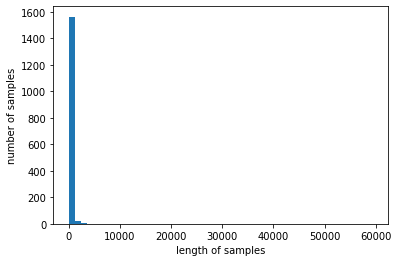

In [ ]:
# html 길이 통계
print('html 최대 길이 : ',max(len(l) for l in sequences))
print('html 평균 길이 : ',(sum(map(len,sequences)))/len(sequences))
plt.hist([len(s) for s in sequences],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# html을 max_len 길이까지만 분석 --> 나머지 데이터는 전부 0으로 변환(해석에 영향X)
max_len = 2500
train_seq = pad_sequences(X_train,maxlen=max_len)
test_seq = pad_sequences(X_test,maxlen=max_len)

# Embedding (RNN)모델 사용

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 16,input_length=2500)) # 임베딩 벡터의 차원은 16 
model.add(SimpleRNN(8)) 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
'''
# 옵션 설정1(테스트용으로 남겨둠)
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
cp = callbacks.ModelCheckpoint('best-embedding-model.h5')
es = callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.compile(optimizer=rms_prop, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_seq, y_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=[cp,es])
'''

In [ ]:
'''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()
'''

In [ ]:
'''
embedding_model = models.load_model('best-embedding-model.h5')
embedding_model.evaluate(test_seq,y_test)
'''

In [ ]:
'''
embedding_model.predict(test_seq)
'''

In [ ]:
cp = callbacks.ModelCheckpoint('best-embedding-model2.h5')
es = callbacks.EarlyStopping(patience=4,restore_best_weights=True,verbose=1)
rl = callbacks.ReduceLROnPlateau(patience=3)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history_2 = model.fit(train_seq,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[cp,es,rl])

Epoch 1/100
32/32 [==============================] - 130s 4s/step - loss: 0.2536 - acc: 0.9833 - val_loss: 0.2474 - val_acc: 0.9609
Epoch 2/100
32/32 [==============================] - 128s 4s/step - loss: 0.1806 - acc: 0.9814 - val_loss: 0.2005 - val_acc: 0.9648
Epoch 3/100
32/32 [==============================] - 127s 4s/step - loss: 0.1358 - acc: 0.9863 - val_loss: 0.1755 - val_acc: 0.9648
Epoch 4/100
32/32 [==============================] - 127s 4s/step - loss: 0.1024 - acc: 0.9912 - val_loss: 0.1568 - val_acc: 0.9648
Epoch 5/100
32/32 [==============================] - 127s 4s/step - loss: 0.0791 - acc: 0.9951 - val_loss: 0.1430 - val_acc: 0.9648
Epoch 6/100
32/32 [==============================] - 127s 4s/step - loss: 0.0635 - acc: 0.9961 - val_loss: 0.1348 - val_acc: 0.9688
Epoch 7/100
32/32 [==============================] - 127s 4s/step - loss: 0.0548 - acc: 0.9980 - val_loss: 0.1306 - val_acc: 0.9727
Epoch 8/100
32/32 [==============================] - 128s 4s/step - loss: 0.

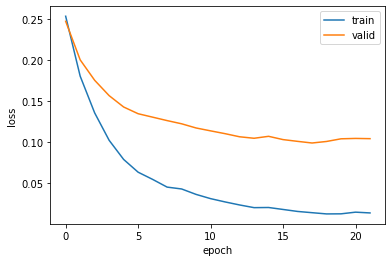

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [ ]:
embedding_model = models.load_model('best-embedding-model2.h5')
embedding_model.evaluate(test_seq,y_test)

10/10 [==============================] - 2s 229ms/step - loss: 0.0856 - acc: 0.9688


[0.08560629189014435, 0.96875]

In [ ]:
embedding_model.predict(test_seq)

array([[0.00767711],
       [0.00470843],
       [0.0055097 ],
       [0.00545981],
       [0.00578262],
       [0.00456313],
       [0.6488794 ],
       [0.79046595],
       [0.57484865],
       [0.18142658],
       [0.06097033],
       [0.00470978],
       [0.01491232],
       [0.06825725],
       [0.00467657],
       [0.00524285],
       [0.00622596],
       [0.00524285],
       [0.03625622],
       [0.00280325],
       [0.34063584],
       [0.00776305],
       [0.03194676],
       [0.00470915],
       [0.00471011],
       [0.5808757 ],
       [0.00456313],
       [0.00283596],
       [0.00288867],
       [0.08548954],
       [0.2173201 ],
       [0.00524285],
       [0.04093948],
       [0.03046939],
       [0.00307992],
       [0.00396627],
       [0.00395251],
       [0.00676492],
       [0.00619451],
       [0.00946943],
       [0.02086401],
       [0.0076717 ],
       [0.3383207 ],
       [0.10421322],
       [0.00369952],
       [0.6268621 ],
       [0.00279564],
       [0.007

# LSTM모델 사용

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size,16,input_length=2500))
model2.add(LSTM(8,dropout=0.4))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
'''
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
cp = callbacks.ModelCheckpoint('best-lstm-model.h5')
es = callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model2.compile(optimizer=rms_prop, loss='binary_crossentropy', metrics=['acc'])
history = model2.fit(train_seq, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[cp,es])
'''

In [ ]:
'''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()
'''

In [ ]:
'''
lstm_model = models.load_model('best-lstm-model.h5')
lstm_model.evaluate(test_seq,y_test)
'''

In [ ]:
'''
lstm_model.predict(test_seq,verbose=0)
'''

In [ ]:
cp = callbacks.ModelCheckpoint('best-lstm-model2.h5')
es = callbacks.EarlyStopping(patience=4,restore_best_weights=True,verbose=1)
rl = callbacks.ReduceLROnPlateau(patience=3)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(train_seq, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[cp,es,rl])

Epoch 1/100
32/32 [==============================] - 14s 301ms/step - loss: 0.6557 - acc: 0.9363 - val_loss: 0.6001 - val_acc: 0.9648
Epoch 2/100
32/32 [==============================] - 9s 285ms/step - loss: 0.4673 - acc: 0.9833 - val_loss: 0.3266 - val_acc: 0.9648
Epoch 3/100
32/32 [==============================] - 9s 284ms/step - loss: 0.2204 - acc: 0.9833 - val_loss: 0.1918 - val_acc: 0.9648
Epoch 4/100
32/32 [==============================] - 9s 284ms/step - loss: 0.1296 - acc: 0.9833 - val_loss: 0.1610 - val_acc: 0.9648
Epoch 5/100
32/32 [==============================] - 9s 271ms/step - loss: 0.1043 - acc: 0.9833 - val_loss: 0.1523 - val_acc: 0.9648
Epoch 6/100
32/32 [==============================] - 9s 271ms/step - loss: 0.0926 - acc: 0.9833 - val_loss: 0.1478 - val_acc: 0.9648
Epoch 7/100
32/32 [==============================] - 9s 271ms/step - loss: 0.0839 - acc: 0.9833 - val_loss: 0.1427 - val_acc: 0.9648
Epoch 8/100
32/32 [==============================] - 9s 284ms/step -

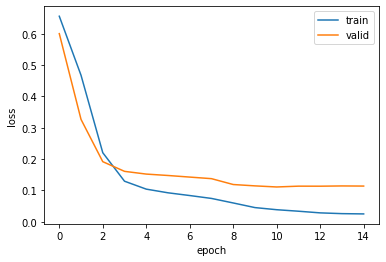

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [ ]:
lstm_model = models.load_model('best-lstm-model2.h5')
lstm_model.evaluate(test_seq,y_test)

10/10 [==============================] - 2s 108ms/step - loss: 0.0726 - acc: 0.9812


[0.0726112425327301, 0.981249988079071]

In [ ]:
lstm_model.predict(test_seq)

array([[0.01244737],
       [0.01226871],
       [0.01206683],
       [0.0123659 ],
       [0.01206683],
       [0.01208958],
       [0.01604627],
       [0.0140143 ],
       [0.0438644 ],
       [0.01399374],
       [0.01471315],
       [0.01226874],
       [0.01231879],
       [0.01380154],
       [0.01219167],
       [0.01210365],
       [0.01251204],
       [0.01210365],
       [0.01403668],
       [0.01201469],
       [0.02144838],
       [0.01244697],
       [0.0155562 ],
       [0.01218987],
       [0.01226858],
       [0.01493433],
       [0.01208958],
       [0.01200344],
       [0.0124691 ],
       [0.01351853],
       [0.02158296],
       [0.01210365],
       [0.01536107],
       [0.01488198],
       [0.01248326],
       [0.0121632 ],
       [0.01221472],
       [0.01255331],
       [0.0120668 ],
       [0.01262514],
       [0.01503912],
       [0.01245222],
       [0.01337865],
       [0.01302582],
       [0.01245746],
       [0.38281813],
       [0.01241366],
       [0.012

# GRU 모델 사용

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size,16,input_length=2500))
model3.add(GRU(8))
model3.add(Dense(1,activation='sigmoid'))

In [ ]:
'''
rms_prop = optimizers.RMSprop(learning_rate=1e-4)
cp = callbacks.ModelCheckpoint('best-gru-model.h5')
es = callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model3.compile(optimizer=rms_prop, loss='binary_crossentropy', metrics=['acc'])
history = model3.fit(train_seq, y_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=[cp,es])
'''

In [ ]:
'''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()
'''

In [ ]:
'''
gru_model = models.load_model('best-gru-model.h5')
gru_model.evaluate(test_seq,y_test)
'''

In [ ]:
# gru_model.predict(test_seq)

In [ ]:
cp = callbacks.ModelCheckpoint('best-gru-model2.h5')
es = callbacks.EarlyStopping(patience=4,restore_best_weights=True,verbose=1)
rl = callbacks.ReduceLROnPlateau(patience=3)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model3.fit(train_seq, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[cp,es,rl])

Epoch 1/100
32/32 [==============================] - 12s 306ms/step - loss: 0.6449 - acc: 0.9569 - val_loss: 0.5892 - val_acc: 0.9648
Epoch 2/100
32/32 [==============================] - 9s 292ms/step - loss: 0.4984 - acc: 0.9833 - val_loss: 0.3981 - val_acc: 0.9648
Epoch 3/100
32/32 [==============================] - 9s 291ms/step - loss: 0.2512 - acc: 0.9833 - val_loss: 0.1828 - val_acc: 0.9648
Epoch 4/100
32/32 [==============================] - 9s 289ms/step - loss: 0.1063 - acc: 0.9833 - val_loss: 0.1474 - val_acc: 0.9648
Epoch 5/100
32/32 [==============================] - 9s 290ms/step - loss: 0.0837 - acc: 0.9833 - val_loss: 0.1448 - val_acc: 0.9648
Epoch 6/100
32/32 [==============================] - 9s 291ms/step - loss: 0.0773 - acc: 0.9833 - val_loss: 0.1438 - val_acc: 0.9648
Epoch 7/100
32/32 [==============================] - 9s 292ms/step - loss: 0.0718 - acc: 0.9833 - val_loss: 0.1418 - val_acc: 0.9648
Epoch 8/100
32/32 [==============================] - 9s 291ms/step -

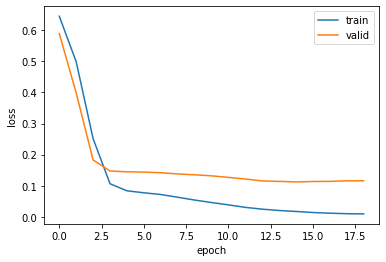

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [ ]:
gru_model = models.load_model('best-gru-model2.h5')
gru_model.evaluate(test_seq,y_test)

10/10 [==============================] - 2s 111ms/step - loss: 0.0731 - acc: 0.9844


[0.07308973371982574, 0.984375]

In [ ]:
gru_model.predict(test_seq)

array([[0.00661442],
       [0.00609129],
       [0.00569724],
       [0.00576984],
       [0.00569724],
       [0.00578594],
       [0.02179246],
       [0.00959545],
       [0.00977877],
       [0.01062192],
       [0.01168548],
       [0.00609129],
       [0.00567115],
       [0.00836758],
       [0.00582933],
       [0.00548998],
       [0.00556381],
       [0.00548998],
       [0.00804294],
       [0.00572052],
       [0.00696648],
       [0.00662107],
       [0.01469653],
       [0.00582677],
       [0.00609129],
       [0.01209971],
       [0.00578594],
       [0.00567747],
       [0.00591665],
       [0.00735625],
       [0.01146843],
       [0.00548998],
       [0.0117983 ],
       [0.01114219],
       [0.00591696],
       [0.00570051],
       [0.0057724 ],
       [0.00593763],
       [0.00569724],
       [0.0144395 ],
       [0.01242   ],
       [0.0066054 ],
       [0.0068112 ],
       [0.00600193],
       [0.00590106],
       [0.01192648],
       [0.00570709],
       [0.005

# onion-share 데이터로 채점

In [ ]:
score = pd.read_csv('unfamiliar.csv')
score.head()

,html,label,path
0,Best Financial Service - #1 shop to ear...,0.0,222222222xn2ozdb2mjnkjrvcopf5thb6la6yj24jvyjqr...
1,"bitcoin, bitcoin generator, free bitcoin ...",0.0,22222uswoye6ve7ixbgkwlvynjrvsg4od2qrs6zs5pbtpr...
2,Underground Market - Prepaid & Cloned Cards...,0.0,2222fxq4xfkvilzdihu5ybce7ztf66fr6c7ub3enabg5iy...
3,Stolen Cards | Plastic Sharks ...,0.0,22c7nfj32ujbnymoo2zh64il46j3k2vuo7kryj757hkhpa...
4,Best Amazon Gift Card ...,0.0,22cwxace6a4cu2yzti4i2x2gikl4wpqr3nz36jlpxoosgi...


In [ ]:
input_2 = score['html']

In [ ]:
# 동일한 불용어 작업수행
nltk.download('words')
words = set(nltk.corpus.words.words())
processed_html_score = []
for num in range(68):
  a = input_2[num]
  if '$' in a :                                 # 달러표시 있으면 
    sent = re.sub('[^a-zA-z0-9$]',' ',a)        # 달러표시는 살려줌 --> $ 100 , $ 2000 과 같은 현상 발생 --> 붙여줄 필요가 있는가? / 붙여주려면 어떻게?
    edit = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if w.lower() in words or not w.isalpha())
    processed_html_score.append(edit)
  else : 
    sent = re.sub('[^a-zA-z0-9]',' ',a)
    edit_2 = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if w.lower() in words or not w.isalpha())
    processed_html_score.append(edit_2)
len(processed_html_score)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


68

In [ ]:
# 동일한 불용어 작업 수행2
result_2 = []   
for num in range(68):
  word_tokens = text_to_word_sequence(processed_html_score[num])   
  each_list_2 = []           
  for w in word_tokens:
    if w not in stop_words:    
      each_list_2.append(w)
  result_2.append(each_list_2)     
print(result_2)

[['best', 'financial', 'service', '1', 'shop', 'earn', 'risk', 'free', 'money', 'anybody', 'visa', 'gift', 'western', 'union', 'pay', 'fresh', 'every', 'day', 'escrow', 'onion', 'link', 'best', 'dark', 'web', 'market', 'best', 'financial', 'market', 'gift', 'money', 'via', 'western', 'union', 'see', 'dark', 'see', 'someone', 'imperial', 'market', 'probably', 'use', 'name', 'careful', 'new', 'added', 'today', 'best', 'financial', 'market', 'sell', 'best', 'quality', 'us', 'specialized', '5', 'experience', 'field', 'check', 'every', 'card', 'shipping', 'also', 'offer', 'full', 'refund', 'face', 'order', 'shipping', 'privacy', 'best', 'support', 'ship', 'country', 'world', '100', 'always', 'glad', 'help', '100', 'satisfaction', 'escrow', 'detailed', 'refund', 'guarantee', 'work', 'via', 'escrow', 'directly', 'simple', 'safe', 'see', 'come', 'use', 'magnetic', 'strip', 'chip', 'purchase', 'put', 'parcel', 'full', 'guide', 'safely', 'cash', 'visa', 'associated', 'bank', 'account', 'person',

In [ ]:
tokenizer = Tokenizer()  
tokenizer.fit_on_texts(result_2)
sequences_2 = tokenizer.texts_to_sequences(result_2)  
print(sequences_2[:5])

[[18, 226, 40, 9, 117, 595, 133, 64, 5, 1788, 70, 16, 48, 23, 26, 271, 97, 203, 91, 65, 69, 18, 141, 104, 87, 18, 226, 87, 16, 5, 177, 48, 23, 197, 141, 197, 596, 1789, 87, 770, 37, 84, 1330, 78, 232, 382, 18, 226, 87, 110, 18, 198, 8, 771, 25, 449, 204, 129, 97, 2, 61, 106, 158, 142, 183, 1331, 7, 61, 151, 18, 85, 159, 126, 33, 12, 272, 772, 184, 12, 773, 91, 930, 183, 57, 34, 177, 91, 526, 597, 38, 197, 345, 37, 233, 1790, 1332, 205, 527, 931, 142, 88, 55, 59, 70, 598, 185, 10, 326, 407, 774, 37, 327, 1333, 383, 1334, 599, 2, 932, 5, 2, 2, 528, 37, 42, 491, 1335, 679, 933, 34, 33, 60, 22, 53, 41, 19, 44, 18, 42, 9, 2, 359, 50, 52, 12, 408, 7, 934, 34, 33, 60, 22, 53, 41, 19, 44, 18, 42, 52, 359, 50, 246, 134, 9, 9, 52, 145, 450, 775, 7, 776, 34, 33, 60, 22, 53, 41, 19, 44, 18, 42, 25, 359, 50, 160, 39, 9, 9, 9, 25, 145, 273, 1791, 7, 598, 185, 10, 326, 407, 774, 37, 327, 1333, 383, 1334, 599, 2, 932, 5, 2, 2, 528, 37, 42, 491, 1335, 679, 933, 34, 33, 60, 22, 53, 41, 19, 44, 18, 42, 9

In [ ]:
word_to_index = tokenizer.word_index  
word_to_index

In [ ]:
max_len = 2500
score_seq = pad_sequences(sequences_2,maxlen=max_len)
score_test = score['label']

In [ ]:
# 앞서 만든 embedding_model 로 예측
embedding_model.evaluate(score_seq,score_test)

3/3 [==============================] - 1s 230ms/step - loss: nan - acc: 0.5588


[nan, 0.5588235259056091]

In [ ]:
res = embedding_model.predict(score_seq)
res

array([[0.13547958],
       [0.04702447],
       [0.18458742],
       [0.17255393],
       [0.22501245],
       [0.37746063],
       [0.27005526],
       [0.4354944 ],
       [0.33611426],
       [0.49093038],
       [0.16954236],
       [0.5427272 ],
       [0.19862041],
       [0.10834958],
       [0.05231449],
       [0.10471156],
       [0.13315646],
       [0.34275484],
       [0.4518908 ],
       [0.25247985],
       [0.33166692],
       [0.5364959 ],
       [0.14661369],
       [0.05195614],
       [0.71147686],
       [0.05231703],
       [0.21578255],
       [0.8127868 ],
       [0.70567185],
       [0.5364893 ],
       [0.3514068 ],
       [0.07146214],
       [0.7217903 ],
       [0.06773325],
       [0.12234507],
       [0.19947107],
       [0.12424687],
       [0.49981058],
       [0.4333916 ],
       [0.0730508 ],
       [0.27961585],
       [0.14980094],
       [0.130183  ],
       [0.53050786],
       [0.25415686],
       [0.8304942 ],
       [0.08347109],
       [0.255

In [ ]:
df_res = pd.DataFrame(res)
df_res.to_csv('check.csv',index=False)

In [ ]:
# lstm_model 로 예측
lstm_model.evaluate(score_seq,score_test)

3/3 [==============================] - 1s 108ms/step - loss: nan - acc: 0.6618


[nan, 0.6617646813392639]

In [ ]:
lstm_model.predict(score_seq)

array([[0.01371628],
       [0.01440561],
       [0.01368796],
       [0.01325656],
       [0.0140925 ],
       [0.01364602],
       [0.01381897],
       [0.01393341],
       [0.01376757],
       [0.01340737],
       [0.01358812],
       [0.01382003],
       [0.01359436],
       [0.01427995],
       [0.01369606],
       [0.01340012],
       [0.01340853],
       [0.01414896],
       [0.01601183],
       [0.01283317],
       [0.01555444],
       [0.01372606],
       [0.0139467 ],
       [0.0136931 ],
       [0.02150055],
       [0.01369636],
       [0.01346611],
       [0.01412217],
       [0.01367153],
       [0.01372617],
       [0.01386779],
       [0.01314751],
       [0.02054357],
       [0.01441008],
       [0.04308398],
       [0.01473315],
       [0.01354057],
       [0.01406275],
       [0.01396005],
       [0.01331007],
       [0.01467896],
       [0.02682026],
       [0.01892319],
       [0.01513462],
       [0.01512157],
       [0.02112223],
       [0.0132967 ],
       [0.013

In [ ]:
# gru_model 로 예측
gru_model.evaluate(score_seq,score_test)

3/3 [==============================] - 1s 109ms/step - loss: nan - acc: 0.6618


[nan, 0.6617646813392639]

In [ ]:
gru_model.predict(score_seq)

array([[0.00755001],
       [0.00670061],
       [0.00755709],
       [0.0061561 ],
       [0.01044452],
       [0.00822791],
       [0.00634304],
       [0.00641472],
       [0.00654163],
       [0.00694569],
       [0.00808741],
       [0.00665438],
       [0.0073612 ],
       [0.00921794],
       [0.00684734],
       [0.00686723],
       [0.00743032],
       [0.0088973 ],
       [0.01114175],
       [0.00620046],
       [0.01203478],
       [0.00906987],
       [0.00772669],
       [0.00684734],
       [0.04326122],
       [0.00684734],
       [0.00696996],
       [0.00923289],
       [0.00659358],
       [0.00906987],
       [0.00809488],
       [0.01360895],
       [0.0432578 ],
       [0.0106345 ],
       [0.00870249],
       [0.00869773],
       [0.00739683],
       [0.00715629],
       [0.00641664],
       [0.0066916 ],
       [0.00938824],
       [0.00920507],
       [0.01046648],
       [0.0138002 ],
       [0.01450731],
       [0.01558641],
       [0.00643088],
       [0.007